IMPORTING THE RELEVANT PACKAGES.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

LOADING THE DATA

In [4]:
#THE DATA WILL BE ASSIGNED THE NAME "salary'
salary=pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


CHECKING THE DESCRIPTIVES OF THE DATASET

In [6]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


EXPLORING THE PDFS OF THE VARIABLES

C:\Users\OPABODE LUKUMAN\AppData\Local\Temp\ipykernel_9584\2106810939.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['YearsExperience'])


<Axes: xlabel='YearsExperience', ylabel='Density'>

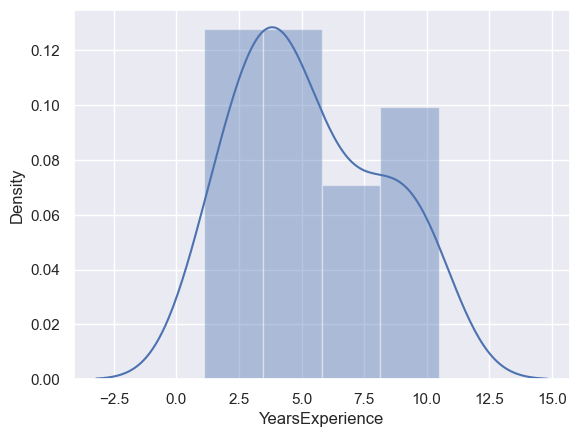

In [8]:
#YearsExperience
sns.distplot(salary['YearsExperience'])

C:\Users\OPABODE LUKUMAN\AppData\Local\Temp\ipykernel_9584\3331680651.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

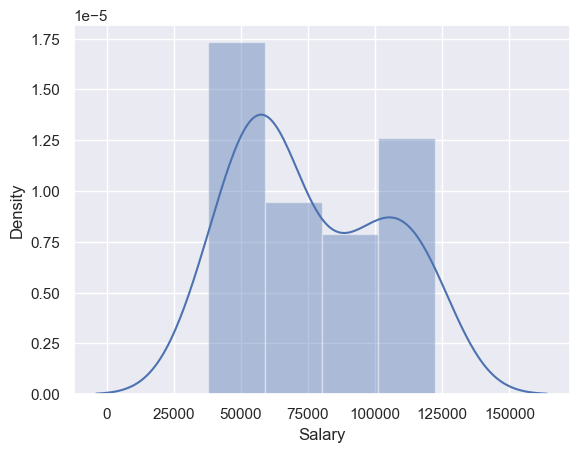

In [9]:
#Salary
sns.distplot(salary['Salary'])

SPLITTING THE DATA INTO 'TESTING' AND 'TRAINING' DATA

In [11]:
#We are going to use 80%(24) of our dataset to train the model and the remaining 20%(6) to test it.
from sklearn.model_selection import train_test_split
splitted=train_test_split(salary,test_size=0.2)

-80% of the dataset will be used to train the model.
-The remaining 20% will be used to test the model's performance

LOADING THE TRAINING DATASET

In [13]:
#THE TRAINING DATASET ARE GOING TO BE ASSIGNED TO "train"
train=splitted[0]
train

,YearsExperience,Salary
23,8.2,113812
26,9.5,116969
9,3.7,57189
29,10.5,121872
20,6.8,91738
25,9.0,105582
21,7.1,98273
5,2.9,56642
16,5.1,66029
6,3.0,60150


RESETTING THE INDEX

In [15]:
train.reset_index(drop=True)

,YearsExperience,Salary
0,8.2,113812
1,9.5,116969
2,3.7,57189
3,10.5,121872
4,6.8,91738
5,9.0,105582
6,7.1,98273
7,2.9,56642
8,5.1,66029
9,3.0,60150


CHECKING THE DESCRIPTIVES OF THE TRAINING DATASET

In [17]:
train.describe()

,YearsExperience,Salary
count,24.000000,24.000000
mean,5.712500,80378.208333
std,2.829551,27060.525561
min,1.300000,39891.000000
25%,3.575000,57131.000000
50%,5.200000,74650.500000
75%,8.325000,106544.250000
max,10.500000,122391.000000


DECLARING THE DEPENDENT AND INDEPENDENT VARIABLE

In [19]:
x_tr=train['YearsExperience']
y_tr=train['Salary']

In [20]:
#THE INDEPENDENT VARIABLES NEED TO BE RESHAPED SINCE ITS A SIMPLE LINEAR REGRESSION WHERE OUR DATA ARE NOY YET IN THE FORM OF ND.ARRAYS
reshaped_x=x_tr.values.reshape(-1,1)

EXPLORING THE DATA

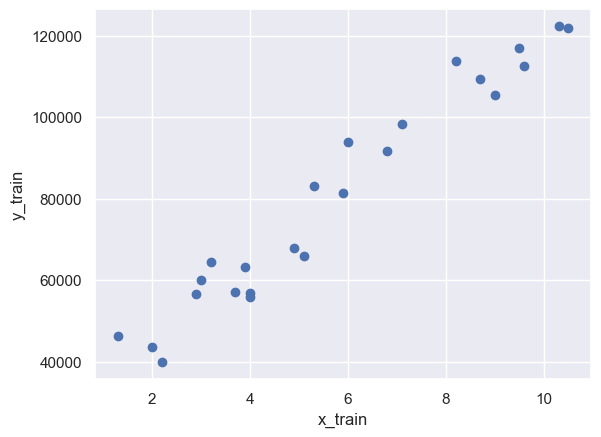

In [22]:
plt.scatter(reshaped_x,y_tr)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.show()

CREATING AND FITTING THE REGRESSION WITH THE 'train'

In [24]:
#The regression object will be assigned to 'reg_train', while the fitted-regression will be assigned to 'reg_fitted'
reg=LinearRegression()
reg_fitted=reg.fit(reshaped_x,y_tr)
reg_fitted

LinearRegression()

CHECKING THE SUMMARY OF THE REGRESSION

In [26]:
#R-SQUARED;our result is going to e assigned to "r_squared"
r_squared=reg_fitted.score(reshaped_x,y_tr)
r_squared

0.9524313191465775

In [27]:
#INTERCEPT;our result is going to be assigned to "int"
int=reg_fitted.intercept_
int

27061.69354294934

In [28]:
#COEFFICIENT;our result is going to be assigned to "coeff"
coeff=reg_fitted.coef_
coeff

array([9333.30674668])

SUMMARY TABLE

In [30]:
#The DataFrame is assigned to "table"
table=pd.DataFrame(data=[r_squared],columns=['Rsquared'])
table['Intercept']=int
table['Coefficient']=coeff
table.rename(index={0:'Values'})

,Rsquared,Intercept,Coefficient
Values,0.952431,27061.693543,9333.306747


INSERTING OUR REGRESSION LINE

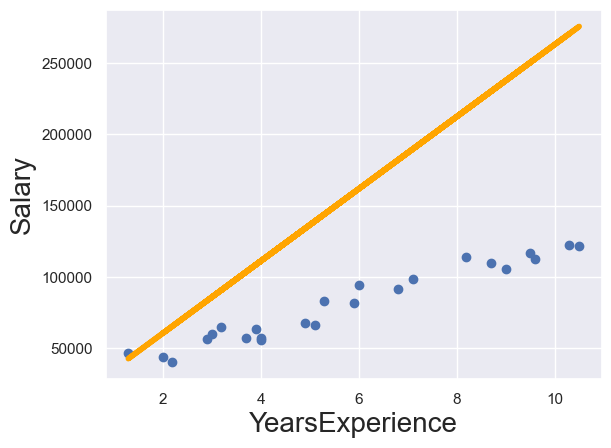

In [32]:
plt.scatter(reshaped_x,y_tr)
yhat=25353.79*reshaped_x+9580.01
fig=plt.plot(reshaped_x,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('YearsExperience',fontsize=20)
plt.ylabel('Salary',fontsize=20)
plt.show()

TESTING OUR MODEL

In [34]:
#The testing dataset is assigned to "test"
test=splitted[1]
test

,YearsExperience,Salary
0,1.1,39343
7,3.2,54445
22,7.9,101302
14,4.5,61111
13,4.1,57081
2,1.5,37731


In [35]:
#Resetting the index
test.reset_index(drop=True)

,YearsExperience,Salary
0,1.1,39343
1,3.2,54445
2,7.9,101302
3,4.5,61111
4,4.1,57081
5,1.5,37731


DECLARING THE DEPENDENT AND THE INDEPENDENT VARIABLES

In [37]:
x_test=test['YearsExperience']
y_test=test['Salary']

RESHAPING X_TEST

In [39]:
x_test_matrix=x_test.values.reshape(-1,1)

MAKING PREDICTION WITH THE TEST DATA USING THE TRAINED-MODEL

In [41]:
#the predicted values are assigned to "yhat_test"
yhat_test=reg_fitted.predict(x_test_matrix)
yhat_test

array([ 37328.33096429,  56928.27513231, 100794.81684169,  69061.57390299,
        65328.25120432,  41061.65366296])

CREATING A SCATTER PLOT WITH Y_HAT_TEST AND Y_TEST

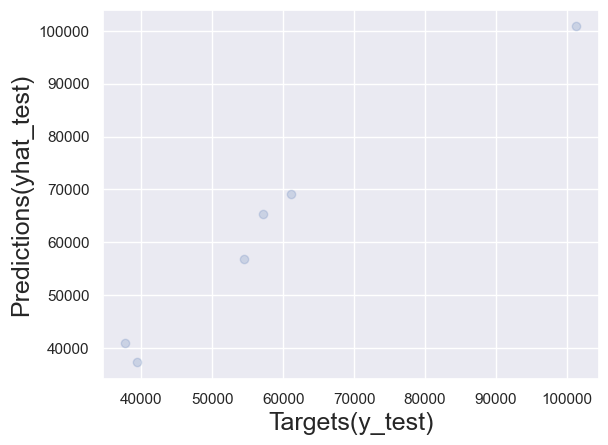

In [43]:
#"y_test" represents the TARGETS of the testing datasets
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel('Targets(y_test)',size=18)
plt.ylabel('Predictions(yhat_test)',size=18)
plt.show()

CHECKING THE PERFORMANCE OF OUR MODEL

In [45]:
#ROUNDING OUR PREDICTIONS TO THE NEAREST WHOLE NUMBERS
y_hat_test=yhat_test.round(0)

In [87]:
#CREATING A DATAFRAME FOR OUR PREDICTIONS
df_pf=pd.DataFrame(y_hat_test,columns=['Predictions'])
df_pf

,Predictions
0,37328.0
1,56928.0
2,100795.0
3,69062.0
4,65328.0
5,41062.0


In [89]:
Targets=y_test.reset_index(drop=True)
Targets

0     39343
1     54445
2    101302
3     61111
4     57081
5     37731
Name: Salary, dtype: int64

In [91]:
#ADDING THE TARGETS OF OUR TEST DATASET TO THE DATAFRAME
df_pf['Targets']=Targets
df_pf

,Predictions,Targets
0,37328.0,39343
1,56928.0,54445
2,100795.0,101302
3,69062.0,61111
4,65328.0,57081
5,41062.0,37731


In [95]:
#GETTING THE DIFFERENCE BETWEEN OUR "TARGETS" AND "PREDICTIONS" USING "RESIDUAL=TARGETS-PREDICTIONS"
df_pf['Residual']=df_pf['Targets']-df_pf['Predictions']
df_pf

,Predictions,Targets,Residual
0,37328.0,39343,2015.0
1,56928.0,54445,-2483.0
2,100795.0,101302,507.0
3,69062.0,61111,-7951.0
4,65328.0,57081,-8247.0
5,41062.0,37731,-3331.0


In [97]:
#PERCENTAGE DIFFERENCE
df_pf['Difference%']=np.absolute((df_pf['Residual']/df_pf['Targets'])*100)
df_pf

,Predictions,Targets,Residual,Difference%
0,37328.0,39343,2015.0,5.121623
1,56928.0,54445,-2483.0,4.560566
2,100795.0,101302,507.0,0.500484
3,69062.0,61111,-7951.0,13.010751
4,65328.0,57081,-8247.0,14.447890
5,41062.0,37731,-3331.0,8.828284


EXPLORING THE STATISTICS OF THE DATAFRAME

In [100]:
df_pf.describe()

,Predictions,Targets,Residual,Difference%
count,6.000000,6.000000,6.000000,6.000000
mean,61750.500000,58502.166667,-3248.333333,7.744933
std,22971.541365,23046.158434,4230.827752,5.354178
min,37328.000000,37731.000000,-8247.000000,0.500484
25%,45028.500000,43118.500000,-6796.000000,4.700830
50%,61128.000000,55763.000000,-2907.000000,6.974954
75%,68128.500000,60103.500000,-240.500000,11.965134
max,100795.000000,101302.000000,2015.000000,14.447890


SORTING OUR DATAFRAME BY 'Difference%'

In [103]:
df_pf.sort_values(by=['Difference%'])

,Predictions,Targets,Residual,Difference%
2,100795.0,101302,507.0,0.500484
1,56928.0,54445,-2483.0,4.560566
0,37328.0,39343,2015.0,5.121623
5,41062.0,37731,-3331.0,8.828284
3,69062.0,61111,-7951.0,13.010751
4,65328.0,57081,-8247.0,14.447890


The values in "Difference&" column show how well our model performed despite using different datasets than the training datasets to test its performance.
From our result, all the percentage differences are relatively very low with "14.447890%" being the highest(the least accurate prediction) and "0.500484%" being the lowest(the most accurate prediction)

In [111]:
df_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Predictions  6 non-null      float64
 1   Targets      6 non-null      int64  
 2   Residual     6 non-null      float64
 3   Difference%  6 non-null      float64
dtypes: float64(3), int64(1)
memory usage: 324.0 bytes
